## Generating Plot Distribution of Model Validation Predictions

Importing Packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import gc
import csv
import itertools

from pathlib import Path
from matplotlib import animation
from matplotlib.animation import FuncAnimation

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importing validation predictions and targets and counting each class for every epoch

In [ ]:
file_dir = '/content/drive/MyDrive/Colab Notebooks/Protein Sequence Analysis'
data_folder = Path(file_dir)
predic_val_data = 'eval_preds_Level_1.p'
pred_path = (data_folder / predic_val_data)

with open(pred_path, 'rb') as preds_val:
  pred_val_pkl = pickle.load(preds_val)

level_cnts_pred = []
level_cnts_target = []
target_all = []
pred_all = []

for key in pred_val_pkl:
  # print(key)
  line = pred_val_pkl[key]
  pred = (line['preds'])
  targets = line['targets']
  unique, counts = np.unique(pred, return_counts=True)
  tar_unique, tar_counts = np.unique(pred, return_counts=True)
  print(tar_unique, tar_counts)
  if key=='epoch_1':
    counts=np.insert(counts, 5, values=0)
    tar_counts=np.insert(tar_counts, 5, values=0)
  elif key=='epoch_2':
    counts=np.append(counts,values=0)
    counts=np.append(counts,values=0)
    tar_counts=np.append(tar_counts,values=0)
    tar_counts=np.append(tar_counts,values=0)
  elif len(counts)<7:
    counts=np.append(counts,values=0)
    tar_counts=np.append(tar_counts, values=0)

  level_cnts_pred.append(counts)
  level_cnts_target.append(tar_counts)
  target_all.append(targets)
  pred_all.append(pred)
  print(counts, tar_counts)
  
  

In [49]:
display(target_all[1])
tar_unique, tar_counts = np.unique(target_all, return_counts=True)
display(len(pred_all[1]))
print(tar_unique/50, tar_counts/50)

array([0, 2, 5, ..., 4, 1, 0])

1333

[0.   0.02 0.04 0.06 0.08 0.1  0.12] [243. 421. 445. 104.  60.  46.  14.]


In [50]:
level_cnts_pred
EC_1, EC_2, EC_3, EC_4, EC_5, EC_6, EC_7 = [], [], [], [], [], [], []
tEC_1, tEC_2, tEC_3, tEC_4, tEC_5, tEC_6, tEC_7 = [], [], [], [], [], [], []

for i in range(len(level_cnts_pred)):
  labels_epoch = level_cnts_pred[i]
  labels_tar = level_cnts_target[i]
  EC_1.append(labels_epoch[0])
  EC_2.append(labels_epoch[1])
  EC_3.append(labels_epoch[2])
  EC_4.append(labels_epoch[3])
  EC_5.append(labels_epoch[4])
  EC_6.append(labels_epoch[5])
  EC_7.append(labels_epoch[6])

  tEC_1.append(labels_tar[0])
  tEC_2.append(labels_tar[1])
  tEC_3.append(labels_tar[2])
  tEC_4.append(labels_tar[3])
  tEC_5.append(labels_tar[4])
  tEC_6.append(labels_tar[5])
  tEC_7.append(labels_tar[6])




Producing bar plots for each class prediction at each epoch

In [52]:
import seaborn as sns
from matplotlib import animation
from matplotlib.animation import FuncAnimation

palette = list(reversed(sns.color_palette('Spectral', 7).as_hex()))
labels = ['Oxidoreductase', 'Transferase', 'Hydrolase', 'Lyase', 'Isomerase', 'Ligase', 'Translocase']


In [56]:
y1, y2, y3, y4, y5, y6, y7 = [], [], [], [], [], [], []
def animate(i):
  y1=(EC_1[i])
  y2=(EC_2[i])
  y3=(EC_3[i])
  y4=(EC_4[i])
  y5=(EC_5[i])
  y6=(EC_6[i])
  y7=(EC_7[i])


  ty1=(tEC_1[i])
  ty2=(tEC_2[i])
  ty3=(tEC_3[i])
  ty4=(tEC_4[i])
  ty5=(tEC_5[i])
  ty6=(tEC_6[i])
  ty7=(tEC_7[i])

  values = np.array([y1, y2, y3, y4, y5, y6, y7])
  tar_values = np.array([ty1, ty2, ty3, ty4, ty5, ty6, ty7])

  error = (np.subtract(tar_values,values))

  plt.barh(labels, ([y1, y2, y3, y4, y5, y6, y7]), color=palette)
  # plt.barh(labels, [ty1, ty2, ty3, ty4, ty5, ty6, ty7], fill=False, color='black')
  # plt.plot([1, 2, 3, 4, 5, 6, 7], counts, marker='D', linestyle="", alpha=0.8, color='black')
  # plt.show()
  # plt.errorbar(([y1, y2, y3, y4, y5, y6, y7]),labels, xerr=error, fmt='o', color='black')
  
  tickdict = {'Oxidoreductase': y1, 'Transferase': y2, 'Hydrolase': y3, 'Lyase': y4, 'Isomerase': y5, 'Ligase': y6, 'Translocase': y7}

  sorted_tickdict = sorted(tickdict.items(), key=lambda x: x[1])

  tcks = [i[0] for i in sorted_tickdict]

  plt.title('Enzyme Prediction, Epoch: {}'.format(1+i), color=('blue'))
  plt.xlim(0,800)
  # plt.yticks(np.arange(7), tcks)
  # plt.show()
  # plt.clf()

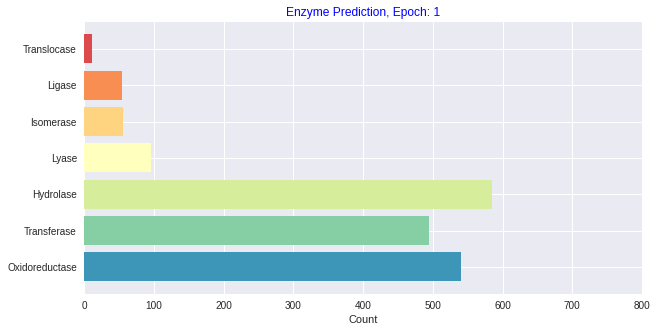

In [57]:
from IPython.display import HTML

fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(1, 1, 1)
# axes.set_xlim(0, 3500)
plt.style.use('seaborn')
axes.set_xlabel('Count')


ani = FuncAnimation(fig, animate, interval=30, frames=np.arange(0,50))
# HTML(ani.to_jshtml())
f = r'/content/drive/MyDrive/Colab Notebooks/Protein Sequence Analysis/animation.gif'
writergif = animation.PillowWriter(fps=60)
ani.save(f, writer=writergif)

Producing the plots one by one for each epoch

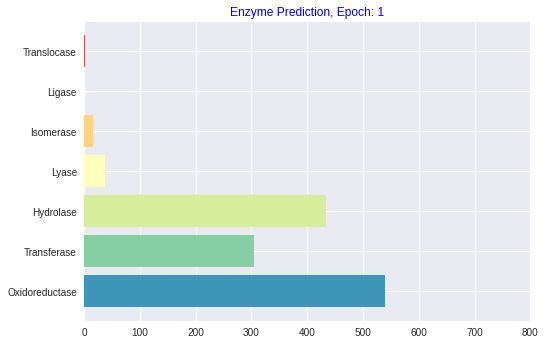

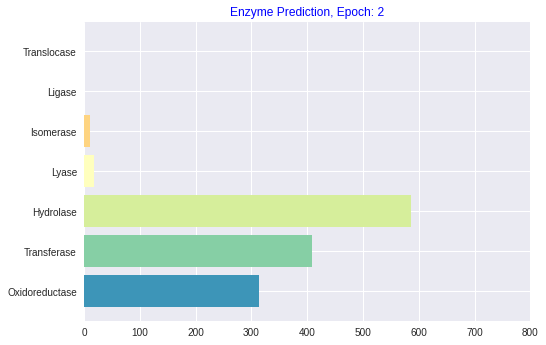

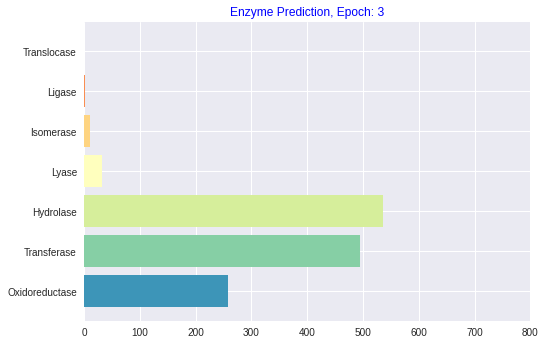

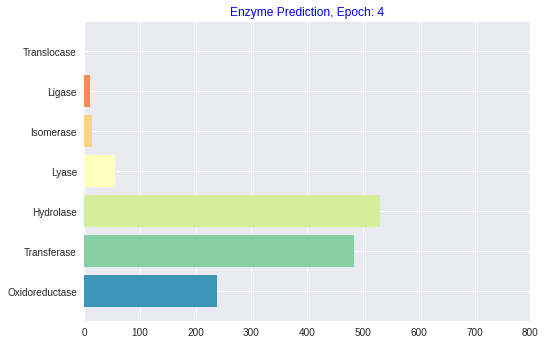

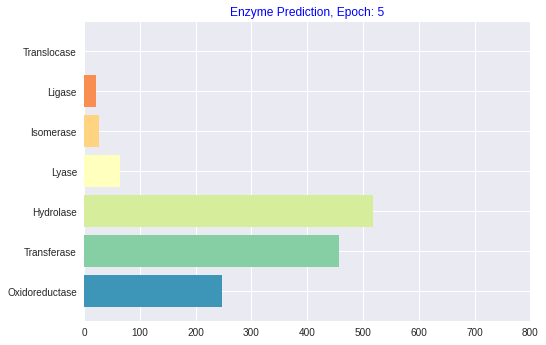

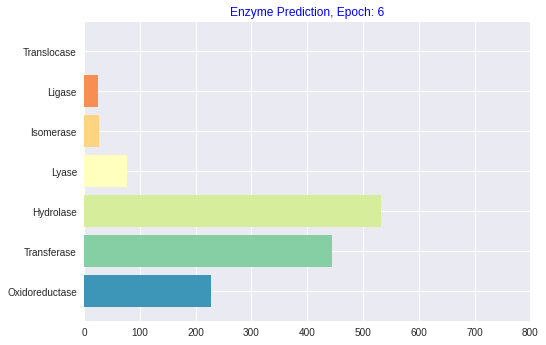

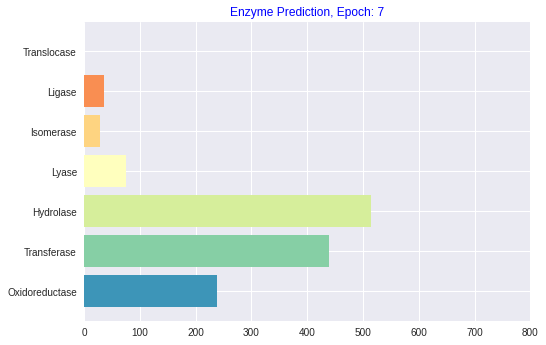

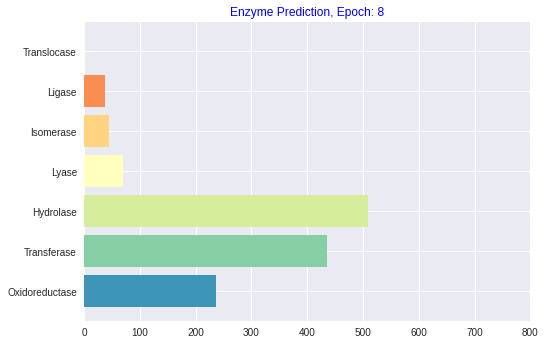

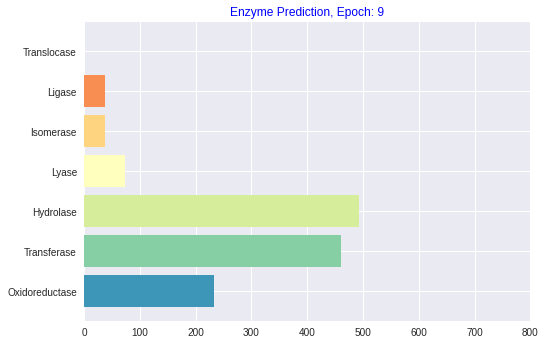

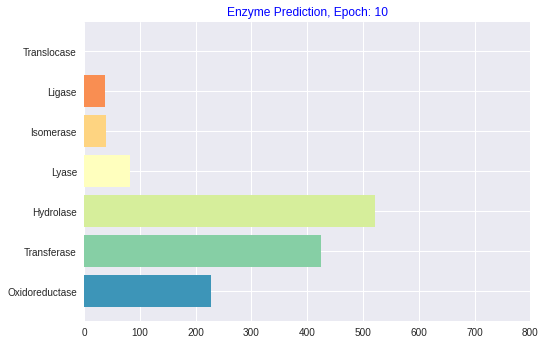

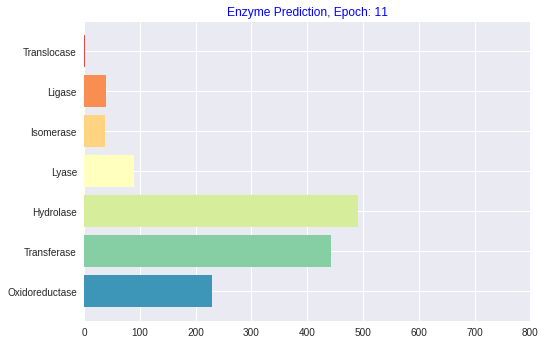

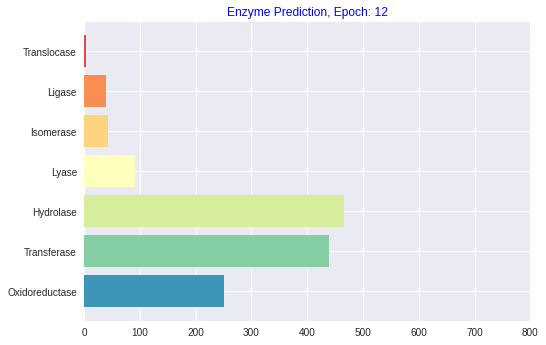

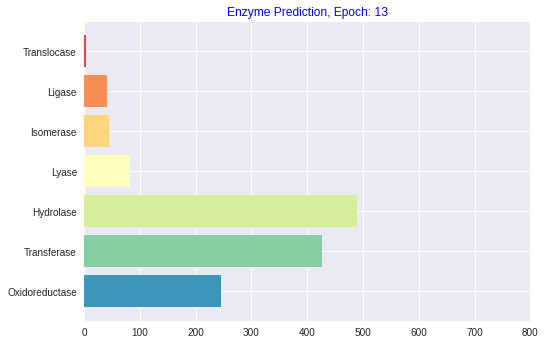

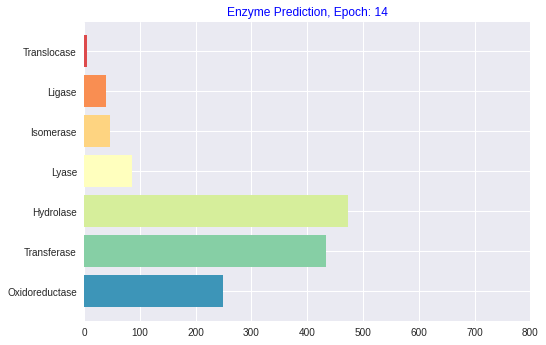

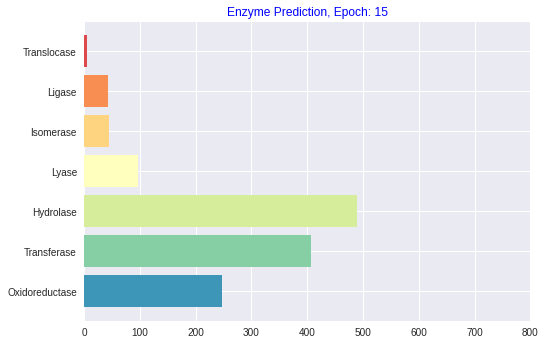

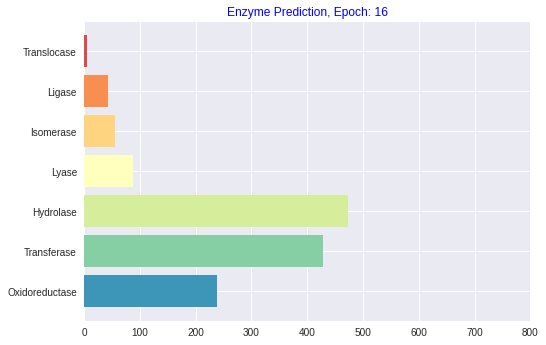

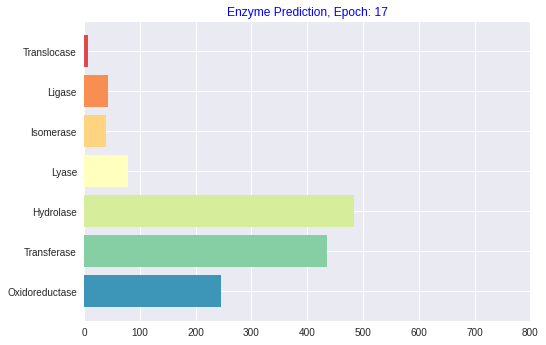

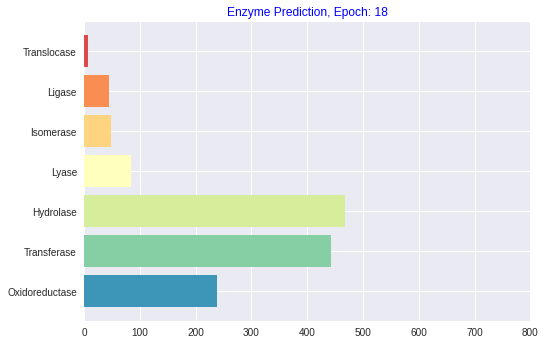

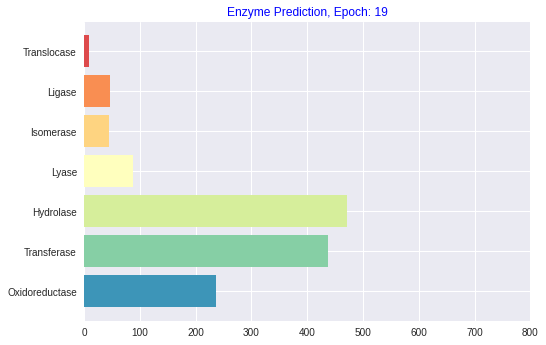

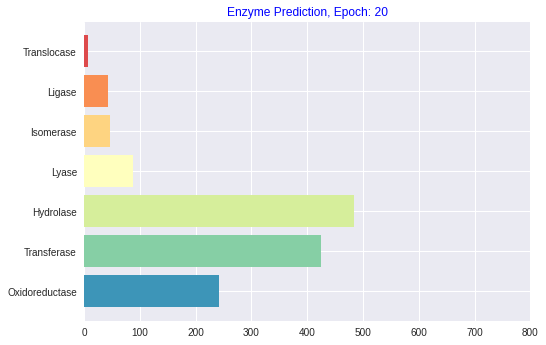

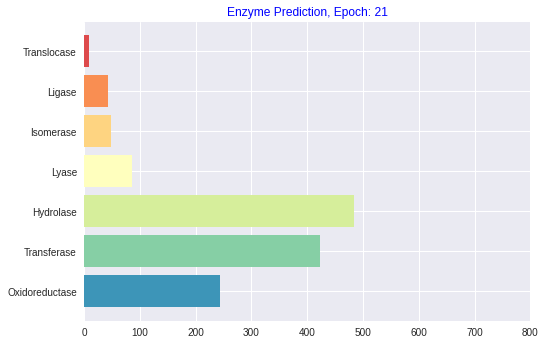

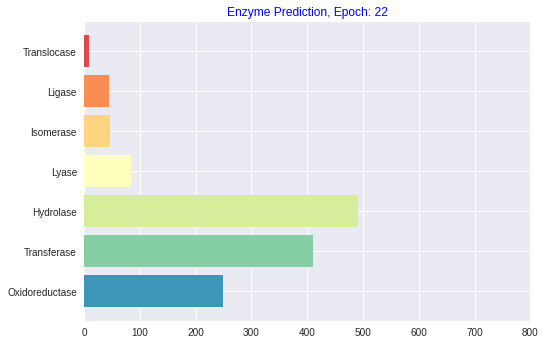

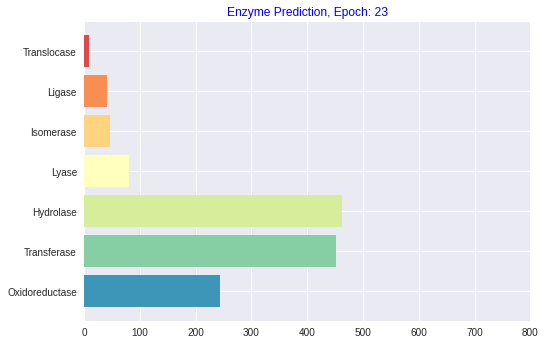

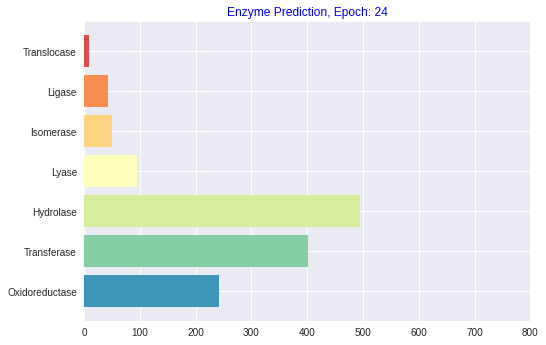

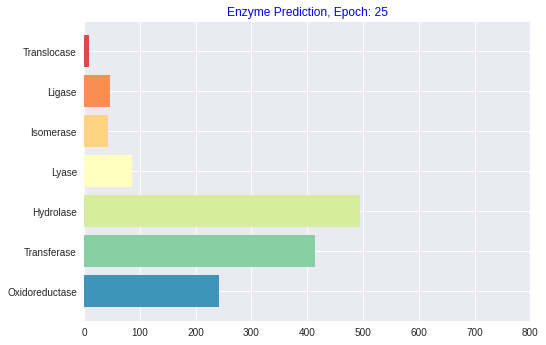

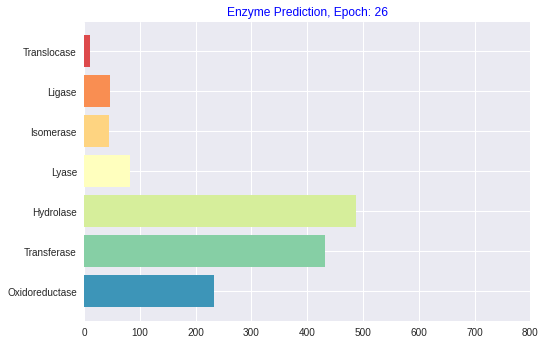

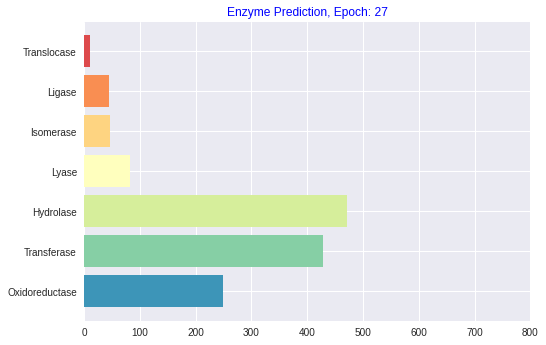

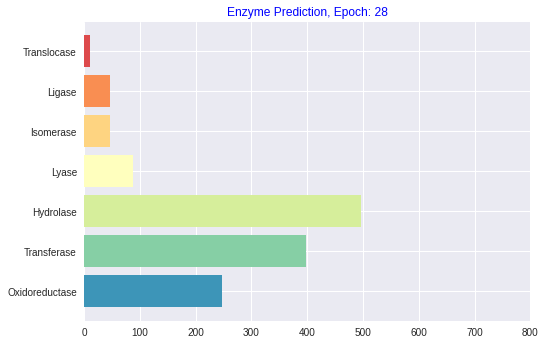

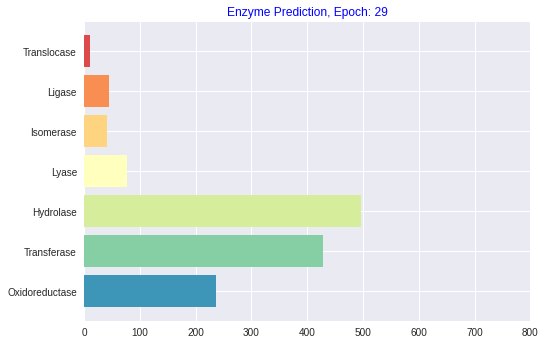

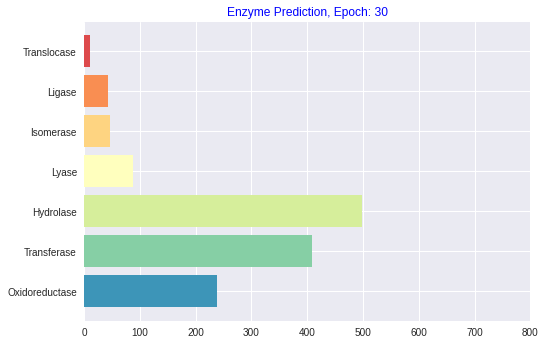

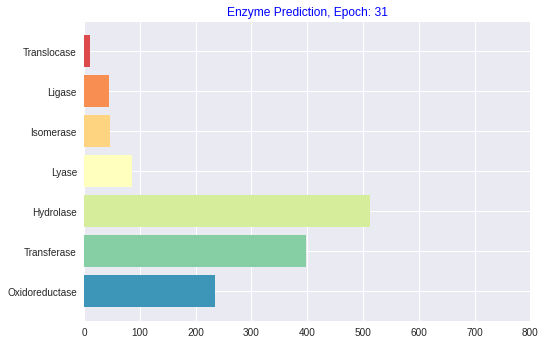

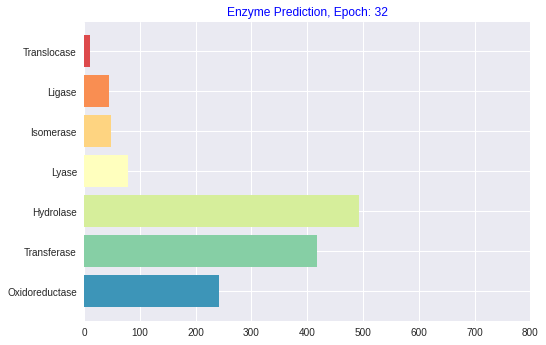

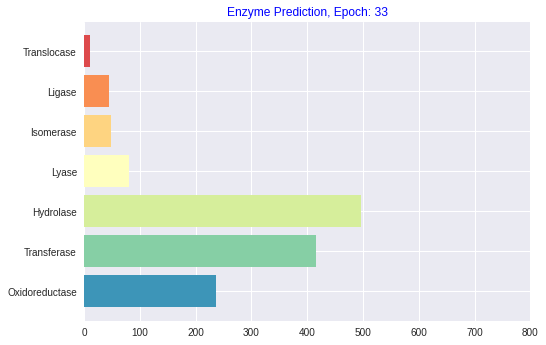

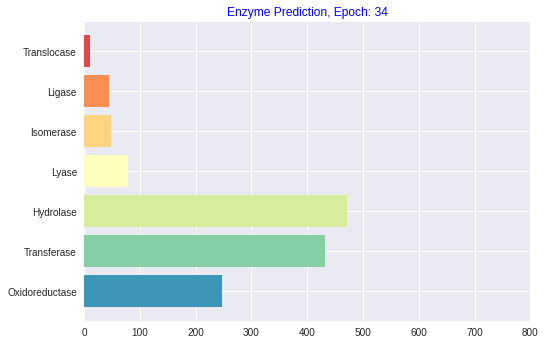

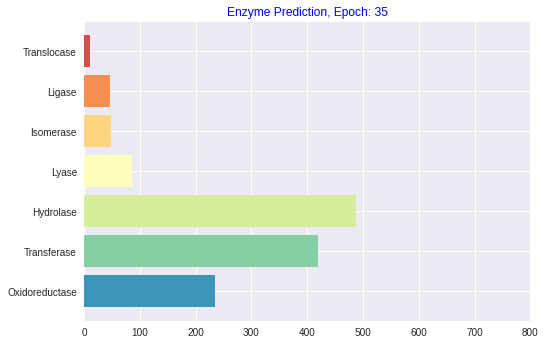

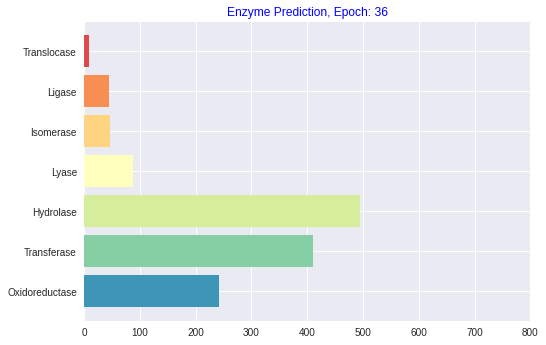

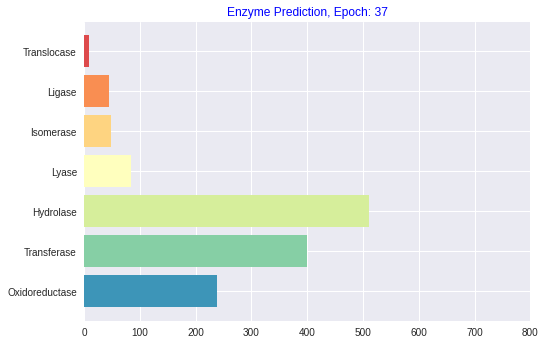

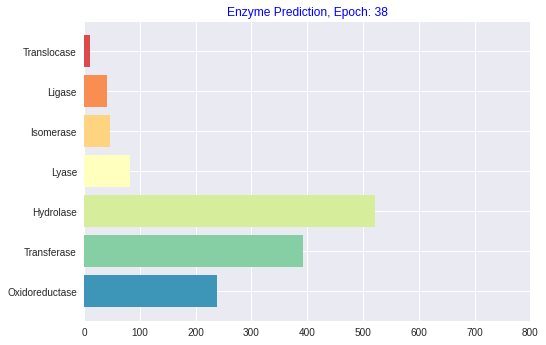

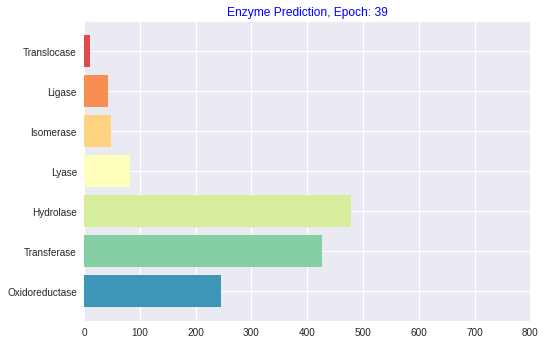

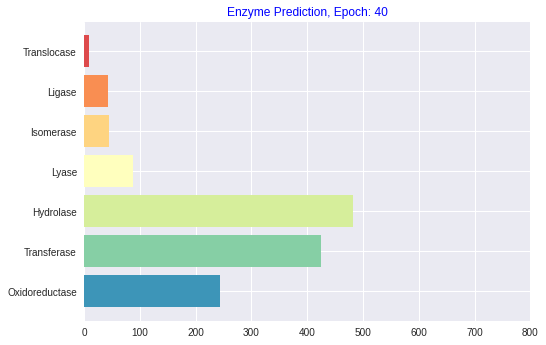

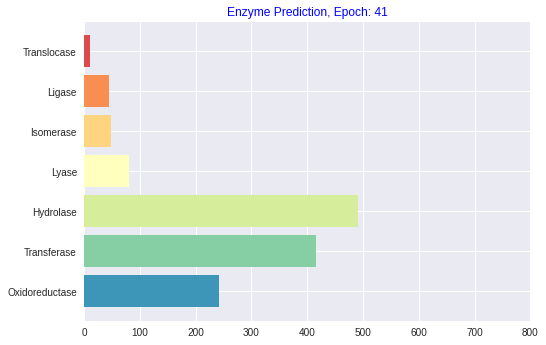

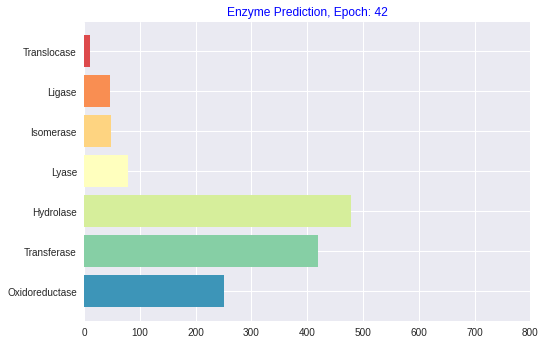

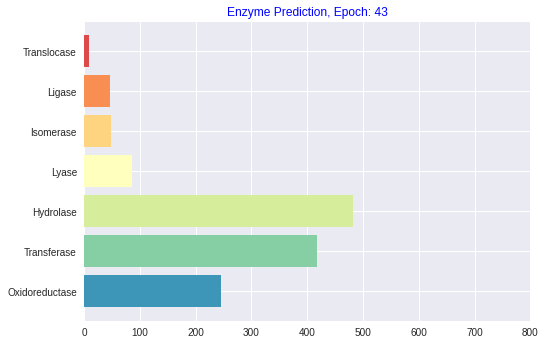

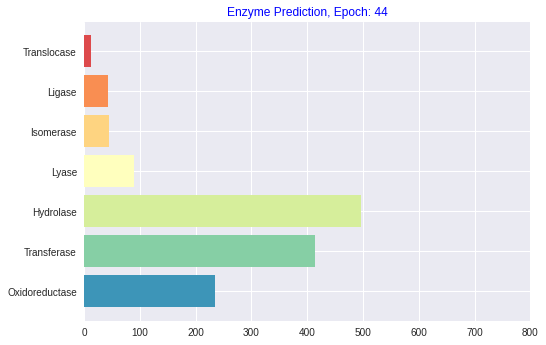

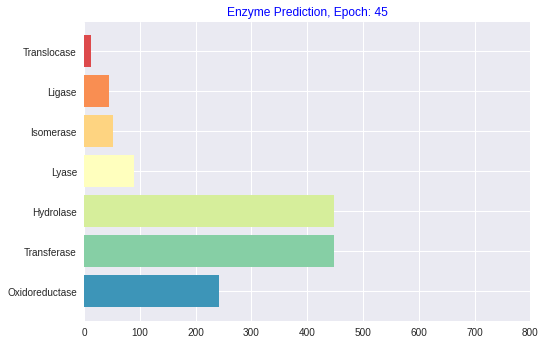

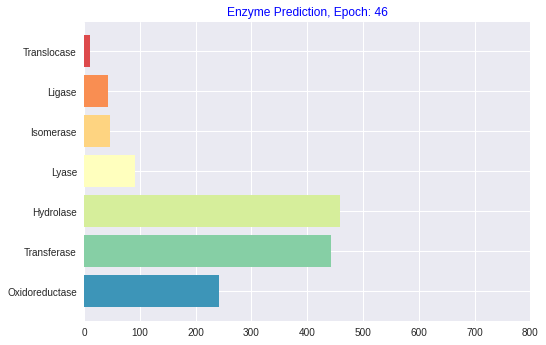

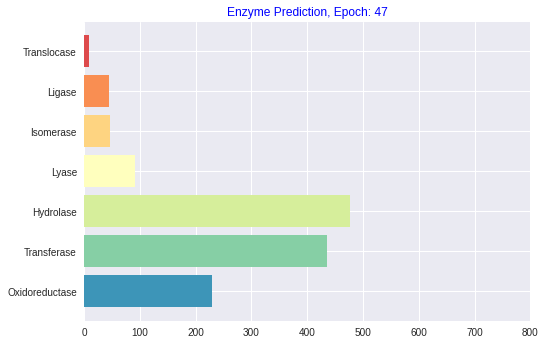

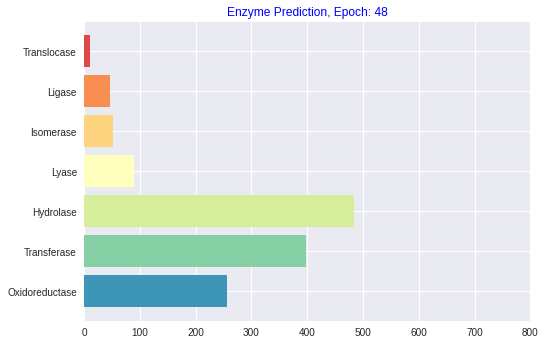

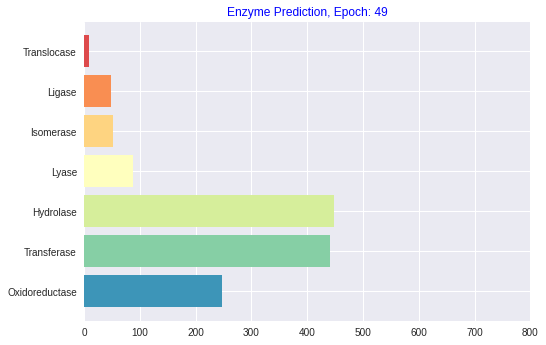

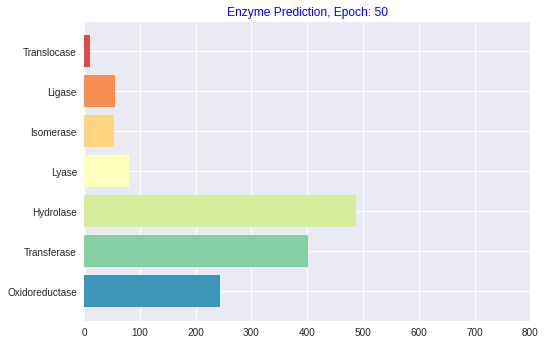

In [58]:
import time 
for i in range(50):
  animate(i)
  time.sleep(0.1)
  plt.show()
  plt.close()